In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

In [2]:
data=pd.read_csv("../../kaggle/ASHRAE/train.csv/train.csv")
weather_info=pd.read_csv("../../kaggle/ASHRAE/weather_train.csv/weather_train.csv")
building_metadata=pd.read_csv("../../kaggle/ASHRAE/building_metadata.csv")
data=data.merge(building_metadata,how="left",on="building_id")
data=data.merge(weather_info,how="left",on=["timestamp","site_id"])

In [3]:
test_data=pd.read_csv("../../kaggle/ASHRAE/test.csv/test.csv")
weather_info_test=pd.read_csv("../../kaggle/ASHRAE/weather_test.csv/weather_test.csv")
test_data=test_data.merge(building_metadata,how="left",on="building_id")
test_data=test_data.merge(weather_info_test,how="left",on=["timestamp","site_id"])

In [9]:
data["timestamp"]=pd.to_datetime(data["timestamp"])
test_data["timestamp"]=pd.to_datetime(test_data["timestamp"])

In [7]:
weather_info.groupby("site_id").apply(lambda group: group.isna().sum())

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,,,,,,,,,
0,0,0,3,3830,3,1,85,250,0
1,0,0,1,7062,1,8763,52,3,0
2,0,0,1,2354,1,66,44,591,5
3,0,0,4,3642,6,37,158,153,4
4,0,0,0,4230,2,1317,73,105,0
5,0,0,2,6030,2,8755,8755,295,3
6,0,0,10,2992,10,0,175,779,39
7,0,0,0,8614,23,7883,8,0,0
8,0,0,3,3830,3,1,85,250,0


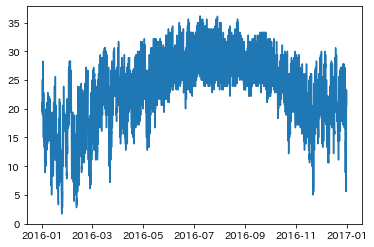

In [13]:
plt.plot(data[data["site_id"]==0]["timestamp"],data[data["site_id"]==0]["air_temperature"])

In [15]:
weather_info

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
